In [1]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
from sosp import simple
from mpl_toolkits.mplot3d.axes3d import Axes3D
from itertools import product

# Gramm. vs. LC link
centers = np.array([[1, 0], [0, 1.]])  # Gramm., LC
cond_names = ['tossed', 'thrown']
conds = np.array([[1.0, 0.8], [1.0, 0.5]])  # Values from ICCM paper
gamma = 0.25  # 0.4 = default

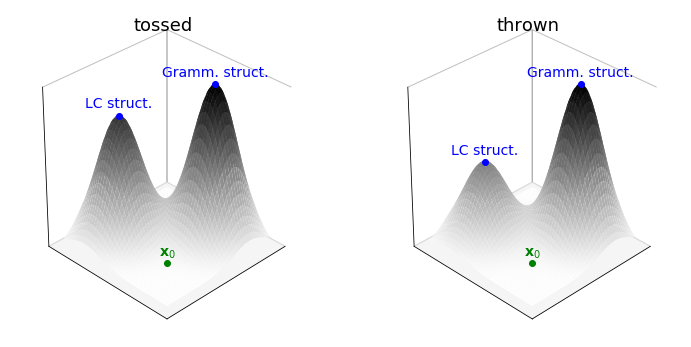

In [52]:
conditions = ['tossed', 'thrown']
delta = 0.025
x1 = np.arange(-0.75, 1.5, delta)
x2 = np.arange(-0.75, 1.5, delta)
x1, x2 = np.meshgrid(x1, x2)
fig = plt.figure(figsize=(12, 6))

for c in range(2):
    Z = np.zeros((len(x1), len(x2)))
    for i, j in product(range(len(x1)), range(len(x2))):
        Z[i, j] = simple.calc_harmony(np.array([x1[i, j], x2[i, j]]), centers, conds[c,], gamma)
    ax = fig.add_subplot(1, 2, c+1, projection='3d')
    ax.plot_surface(x1, x2, Z, cmap='binary', alpha=0.95)
    ax.view_init(azim=-135)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.pane.set_edgecolor('gray')
    ax.yaxis.pane.set_edgecolor('gray')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.plot([1, 0], [0, 1], [1., conds[c,1]], 'bo')
    ax.text(1, 0, 1.05, 'Gramm. struct.', size=14, color='b', horizontalalignment='center')
    ax.text(0, 1, conds[c,1]+0.05, 'LC struct.', size=14, color='b', horizontalalignment='center')
    ax.set_title(cond_names[c], size=18)
    ax.plot([0], [0], [0], 'go')
    ax.text(0, 0, 0.05, '$\mathbf{x}_0$', size=14, color='g', horizontalalignment='center')
#plt.show()
plt.savefig('/Users/garrettsmith/Google Drive/UConn/Research/Dissertation/DissertationDefense/Figures/LCsim.pdf')